In [ ]:
import json
import plotly.express as px
import pandas as pd


# Lese JSON-filen
with open("../data/clean_data/clean_air_quality_nilu_oslo.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Konverter JSON-dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# Konverter "index" til datetime-format
df["index"] = pd.to_datetime(df["index"])

# Lag linjediagram for Verdi_NO2
fig_no2 = px.line(df, x="index", y="Verdi_NO2", title="Verdi NO2 over tid", width=1000, height=500)
fig_no2.show()

# Lag linjediagram for Verdi_O3
fig_o3 = px.line(df, x="index", y="Verdi_O3", title="Verdi O3 over tid", width=1000, height=500)
fig_o3.show()

# Lag linjediagram for Verdi_SO2
fig_so2 = px.line(df, x="index", y="Verdi_SO2", title="Verdi SO2 over tid", width=1000, height=500)
fig_so2.show()


In [10]:
import json
import plotly.graph_objects as go
import pandas as pd

# Lese JSON-filen
with open("../data/clean_data/clean_air_quality_nilu_oslo.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Konverter JSON-dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# Konverter "index" til datetime-format
df["index"] = pd.to_datetime(df["index"])

# Lag en ny kolonne for farge (rød for interpolerte, gul for dekningsgrad < 90, grønn for dekningsgrad >= 90)
def get_color(row):
    # Sjekk om dekningsgrad er False (for interpolerte verdier)
    if not row['Dekningsgrad_NO2'] or not row['Dekningsgrad_O3'] or not row['Dekningsgrad_SO2']:
        return 'red'  # Interpolerte verdier
    elif row['Dekningsgrad_NO2'] < 90 or row['Dekningsgrad_O3'] < 90 or row['Dekningsgrad_SO2'] < 90:
        return 'yellow'  # Dekningsgrad < 90
    else:
        return 'green'  # Dekningsgrad >= 90

# Bruk funksjonen for å lage fargekolonnen
df['color'] = df.apply(get_color, axis=1)

# Lag scatter diagram for Verdi_NO2, med individuell farge for hvert punkt
fig_no2 = go.Figure()

# Legg til data med farge for hvert punkt
fig_no2.add_trace(go.Scatter(x=df["index"], y=df["Verdi_NO2"], mode='lines+markers',
                            marker=dict(color=df['color'], size=6),
                            name="Verdi NO2"))

# Sett tittel og aksler
fig_no2.update_layout(title="Verdi NO2 over tid", width=1000, height=500)

fig_no2.show()

# Lag scatter diagram for Verdi_O3, med individuell farge for hvert punkt
fig_o3 = go.Figure()

# Legg til data med farge for hvert punkt
fig_o3.add_trace(go.Scatter(x=df["index"], y=df["Verdi_O3"], mode='lines+markers',
                            marker=dict(color=df['color'], size=6),
                            name="Verdi O3"))

# Sett tittel og aksler
fig_o3.update_layout(title="Verdi O3 over tid", width=1000, height=500)

fig_o3.show()

# Lag scatter diagram for Verdi_SO2, med individuell farge for hvert punkt
fig_so2 = go.Figure()

# Legg til data med farge for hvert punkt
fig_so2.add_trace(go.Scatter(x=df["index"], y=df["Verdi_SO2"], mode='lines+markers',
                            marker=dict(color=df['color'], size=6),
                            name="Verdi SO2"))

# Sett tittel og aksler
fig_so2.update_layout(title="Verdi SO2 over tid", width=1000, height=500)

fig_so2.show()

Korrelasjonskoeffisient (r): 0.090
P-verdi: 0.000


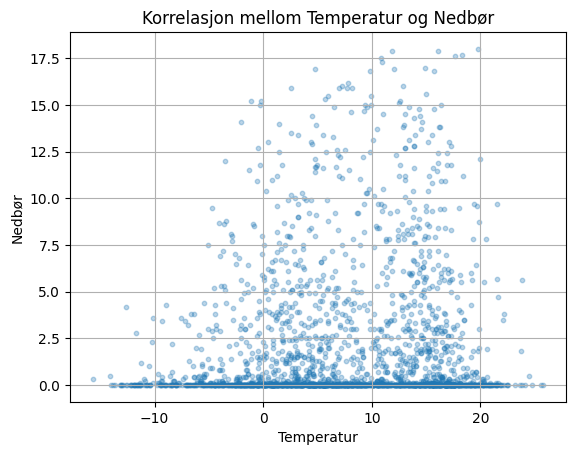

In [8]:
import json
import sys
import pandas as pd

# Lese JSON-filen
with open("../data/clean_data/frostAPI_clean_data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)

x_var = 'Temperatur' 
y_var = 'Nedbør'

sys.path.insert(0, '../src/')
from frostAPI.data_frostAPI import analyse_correlation
analyse_correlation(data, x_var, y_var)


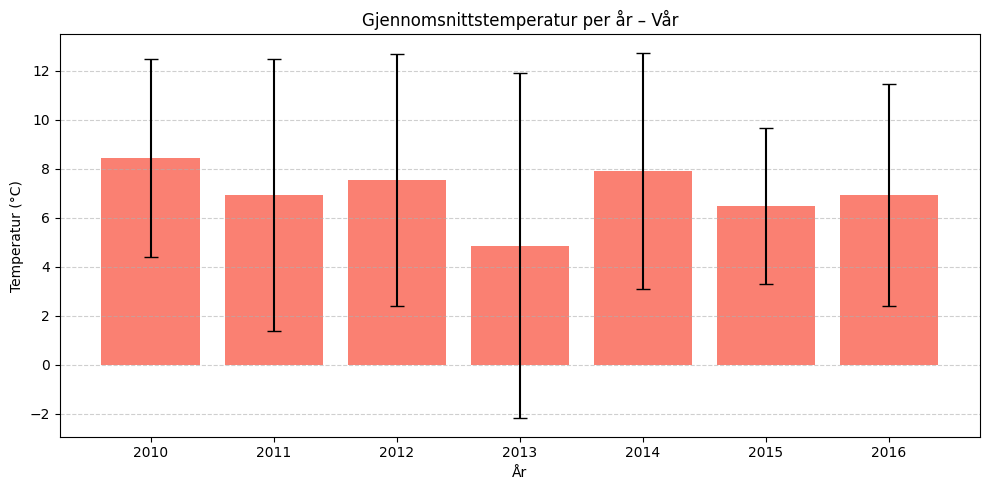

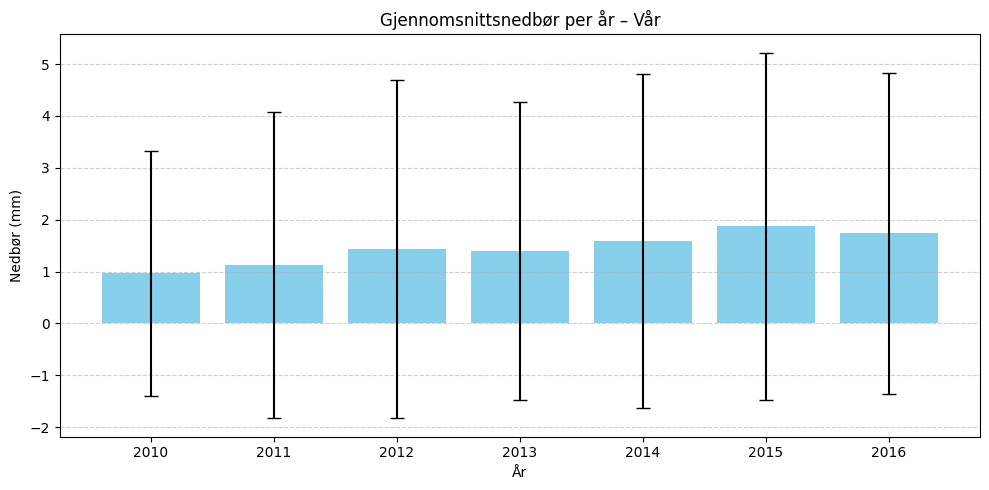

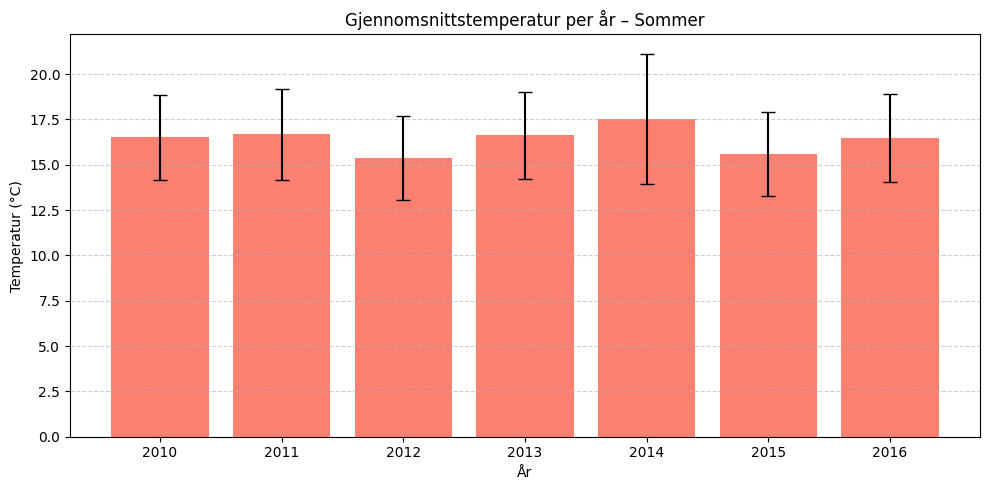

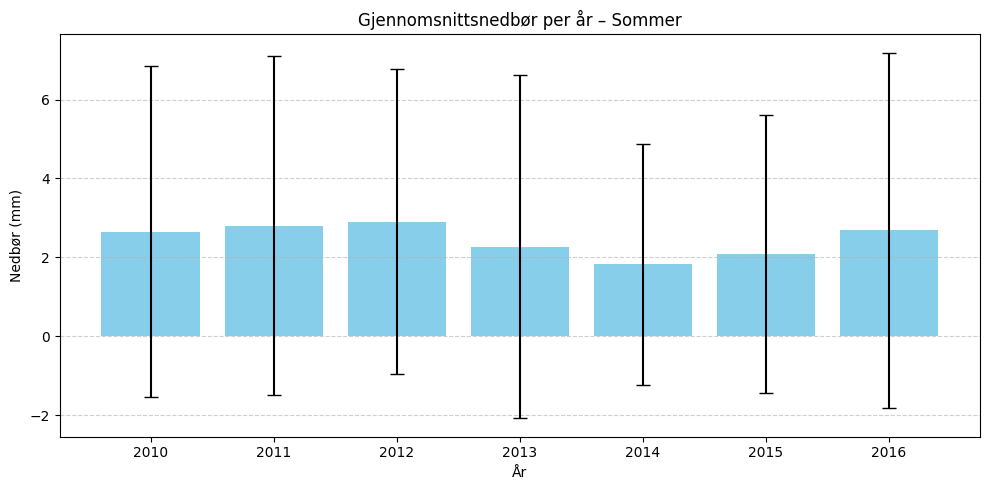

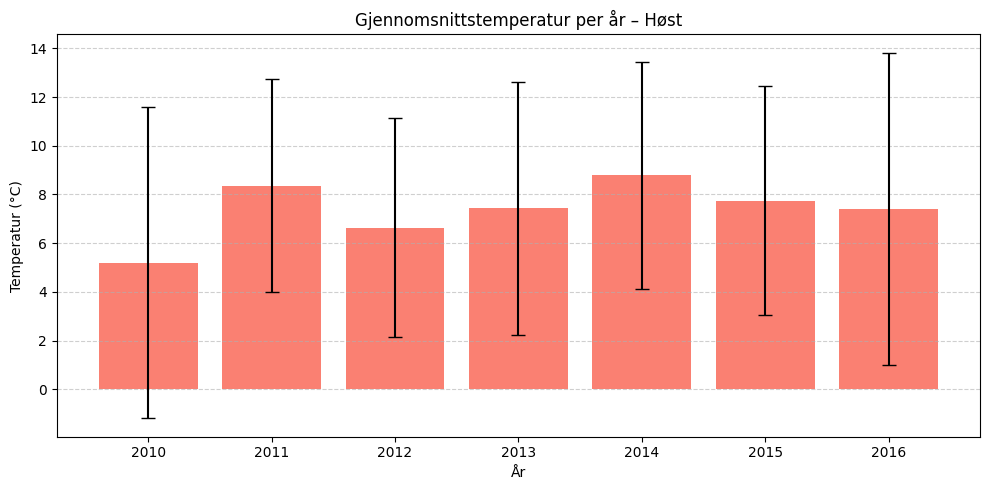

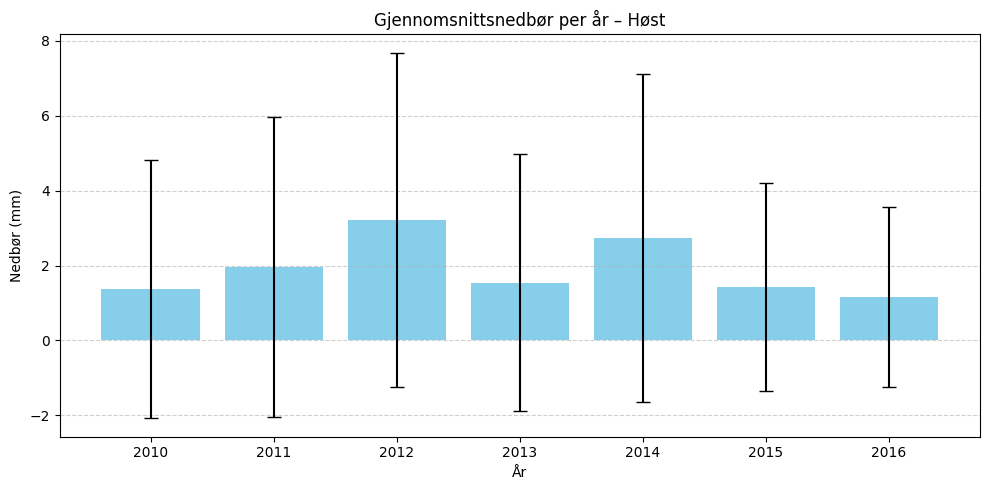

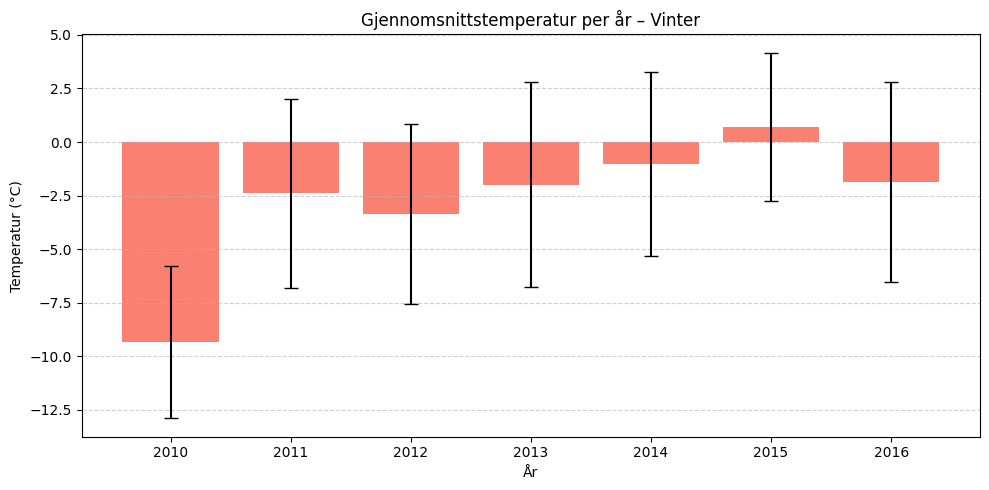

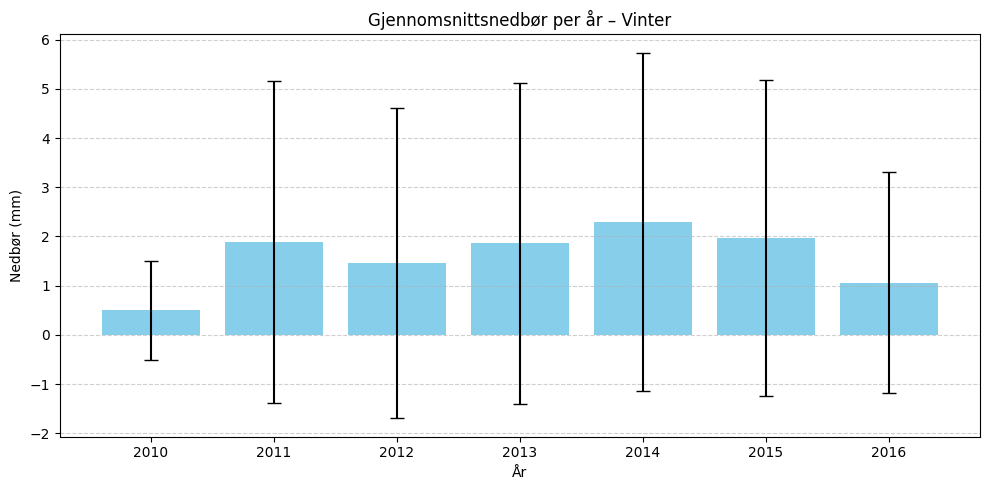

In [3]:
import json
import sys
import pandas as pd

# Lese JSON-filen
with open("../data/clean_data/frostAPI_clean_data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)

sys.path.insert(0, '../src/')
from frostAPI.data_frostAPI import calculate_and_plot_seasonal_bars
calculate_and_plot_seasonal_bars(df)